# **Analysis of Zomato Data**



# **1. Introduction**

**1.a) Dataset description:**

---



The dataset contains the details of restaurants in Bengaluru, India. This dataset is based on Zomato, an Indian restaurant search and discovery service [1]. The dataset contains 51717 rows and 17 columns. This information was fetched based on the shape of the dataset. There are various anomalies in the data like columns containing null values, mismatched information, trailing spaces, and invalid characters etc.

There are only one integer based attribute i.e. votes and all other attributes are object type.

The description of the attributes is given below:

*  **url** is the url of each restaurant. It is a unique identifier in the dataset.
*  **address** is the physical address of the restaurant.
*  **name** is the name of the restaurants. They are repeated in the dataset as one location can have multiple branches of the same restaurant.
* **online_order** column has the values of Yes and No. It signifies if the restaurant accepts the online order or not.
* **book_table** also has the value of Yes and No. The value represents if the restaurant has an option to book the table.
*  **rate** is the average rate of the restaurant out of 5. 
*  **votes** signifies the number of votes counted for the rating of the restaurant.
*  **phone** column contains the phone number of the restaurant.
*  **location** is the physical location of the restaurant.
*  **rest_type** explains the type of the restaurant like casual dining, quick bites etc.
*  **dish_liked** contains a list of dishes liked at the restaurant.
*  **cuisines** is the list of cuisines offered at the restaurant.
*  **Approx_cost(for two people)** contains the approximate cost of food at the restaurant for two people.
*  **reviews_list** contains the reviews given by the customer for the restaurant. It also has the individual rate given by the customer.
*  **menu_item** contains the list of menu items from the menu list of the restaurant.
*  **listed_in(type)** is the type of meals or food types provided at the restaurant. The unique values are: 'Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',  'Drinks & nightlife', 'Pubs and bars'.
*  **listed_in(city)** signifies the location where the restaurant is located. 

# **2. Data pre-processing and EDA**

**2.a) Load the data**

---
Data is loaded in the below cells. This file is created in [Google Colab](https://https://colab.research.google.com/notebooks/welcome.ipynb). Please ensure to upload the dataset before re-running this file. [12]






In [0]:
#Import all libraries
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
#This import will ensure that multiple rows can be printed in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Import the dataset
df = pd.read_csv("/content/drive/My Drive/zomato.csv")

#Verify the first five rows for the sanity check
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari



**2.b) Explore the data**

---


*   Check the shape of the data
*   Verify the number of features, sample and type

**Observations/Trends in data:**


1.   There are 17 columns and 51717 rows in the dataset.
2.   All the columns are objects type except votes which is int64 type.
3.   There are null values present in the dataset.
4.    Distribution of North Indian Food is more in the dataset though the data is based on Bangalore which is located in South India. However, the cuisines column contains repeated values as comma separated values. For right decisions, it should be cleaned.
5. It is noticed that more restaurant data is provided from the location of BTM. The second largest location where many restaurants are present is Koramangla.
6. Most of the restaurants at Bangalore accepts the online order.
7. Based on the distribution of ratings of the restaurants, it can be observed that most of the restaurants in Bangalore have a rating between 3.5 to 4.
8. Most of the restaurants at Bangalore are delivery type. The least type of resturants is Pubs and Bars, Buffet and Drinks & Nightlife.



**Are there attributes that are useless at this point?:**

Yes, based on the observations during the exploration of the data, it was noticed that the following attributes are useless.


*   url
*   phone
*   address
*   menu_item
*   review_list 

**Notes:** The decision related to the importance of any attributes is based on the business problem being solved. The problem statement on which we will be training our models doesn't need the above restaurants. However, for another business problem, the above features could be useful. Thumb rule: Any of your decisions should be directly proportional to the business problem you intend to address.


In [4]:
#Verify the shape of data

print ("\033[1mShape of dataset:")
df.shape

Shape of dataset:


(51717, 17)

In [6]:
#Verify the number of features, samples and type
df.info()

#Verify if there are any null values in the data
print ("\n\033[1mDataset has any null values:")
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

True

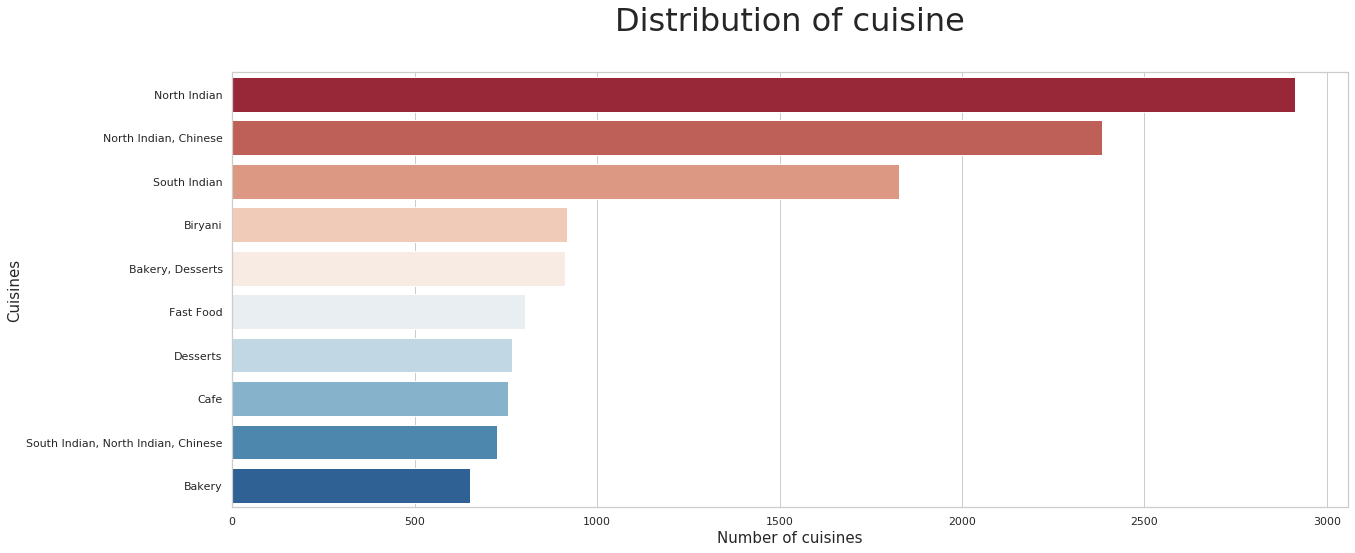

In [9]:
#Verify disribution of the Votes
_ = plt.figure(figsize=(20,8))
_ = plt.title('Distribution of cuisine\n', size=32)
cuisines=df['cuisines'].value_counts()[:10]
x = sns.barplot(cuisines, cuisines.index, palette="RdBu")
x =plt.xlabel('Number of cuisines', fontsize = 15)
x = plt.ylabel('Cuisines', fontsize = 15)

,listed_in(city),count
0,BTM,3279
19,Koramangala 7th Block,2938
17,Koramangala 5th Block,2836
16,Koramangala 4th Block,2779
18,Koramangala 6th Block,2623


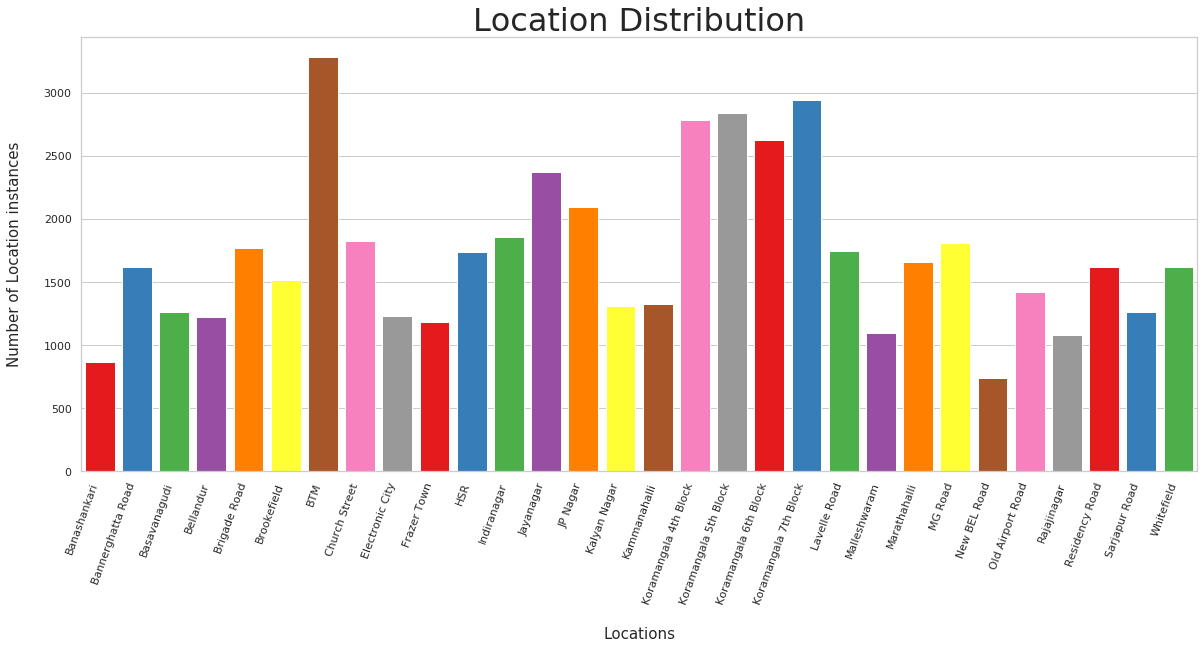

In [11]:
#Verify distribution of location "listed_in(city)""
rcParams['figure.figsize'] = 20,8
location_plot = sns.countplot(x="listed_in(city)",data=df, palette = "Set1", saturation = 1.5)
x = location_plot.set_xticklabels(location_plot.get_xticklabels(), rotation=70, ha="right")
_ = plt.title('Location Distribution',size = 32)
_ = plt.xlabel('\nLocations', fontsize = 15)
_ = plt.ylabel('Number of Location instances\n', fontsize = 15)

#Code to view the count of location based on group by clause at Location
location_count = df.groupby(['listed_in(city)']).size().reset_index(name="count")
location_count = location_count.sort_values('count',ascending = False)[:5]
location_count

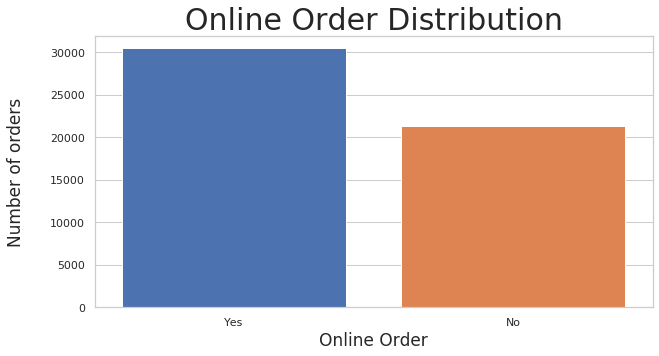

In [12]:
#Verify distribution of location "listed_in(city)""
rcParams['figure.figsize'] = 10,5
onlOrd_plot = sns.countplot(df['online_order'], saturation = 1.5)
_ = plt.title('Online Order Distribution',size = 30)
_ = plt.xlabel('Online Order', fontsize = 17)
_ = plt.ylabel('Number of orders\n', fontsize = 17)

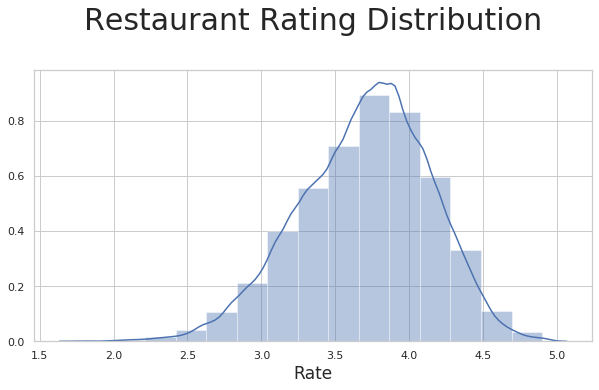

In [14]:
#Verify distribution of rating of restaurants
#Process and clean the rate column to plot the graph of rating
rcParams['figure.figsize'] = 10,5
rate=df['rate'].dropna().apply(lambda r : float(r.split('/')[0]) if (len(r)>3)  else np.nan ).dropna()
_ = sns.distplot(rate,bins=15)
_ = plt.title('Restaurant Rating Distribution\n',size = 30)
_ = plt.xlabel('Rate', fontsize = 17)

Different type of restaurants in Bangalore:


Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

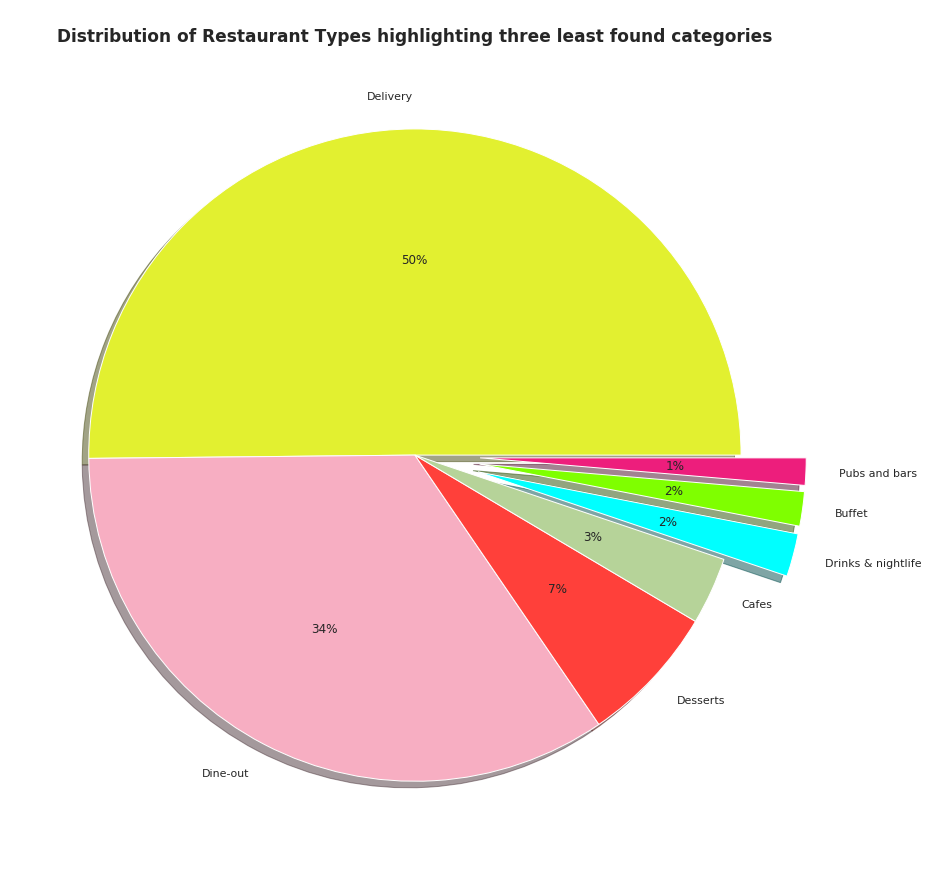

In [15]:
#Check how many different restuarant types are present and visualize their percentage in the dataste
#Pie Chart inspiration reference: https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

print("\033[1mDifferent type of restaurants in Bangalore:")
restTypeCounter=df['listed_in(type)'].value_counts().sort_values(ascending=False)
restTypeCounter

slices=[restTypeCounter[0],
        restTypeCounter[1],
        restTypeCounter[2],
        restTypeCounter[3],
        restTypeCounter[4],
        restTypeCounter[5],
        restTypeCounter[6]]
explode = (0, 0, 0, 0, 0.2, 0.2, 0.2)
labels=['Delivery','Dine-out','Desserts','Cafes','Drinks & nightlife','Buffet','Pubs and bars']
colors = ['#E2F030','#f7aec2','#ff403a','#b6d399','#00ffff','#7fff00','#ED1E7C']
x=plt.pie(slices,explode=explode, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.6, labeldistance=1.1,shadow=True)
fig = plt.gcf()

title = plt.title("\nDistribution of Restaurant Types highlighting three least found categories",size=17, weight="bold")
fig.set_size_inches(15,15)
plt.show()


**2.c) Data Cleaning: Are there restaurant duplicates in the data? Detect and if there is, clean it.**

---

In this section, the data is cleaned based on the observation and exploration of data. The analysis for cleaning is given below:
*   Drop the irrelevant columns after taking their backup. 
* URL and Phone are dropped as they have no relevance in the data.
* Address column is dropped as the exploration of data doesn't need the specific address of the restaurant.
* Location is dropped as it is having reduntant data for listed_in(city). Based on the graphs plotted above, it is  observed that listed_in(city) is having enough data to make the decisions for the models.
* Menu_Item is dropped as it is not required to solve the business problem.
* Review_List is dropped as we do not need the description of customer reviews to address the problem statement. Rate column is enough for analysis.
*   Rename the columns i.e. Give them a meaningful name
*   Verify if there are any null values in the dataset. If they are present remove them.
*   Cost values in the dataset are object type. The column was also observed to have "," (comma) in the numeric values. Hence, the comma was removed and the values were converted into int64. 
*   Rate column has values with '/5'. It signifies that the rating is out of fie. We need to clean the column for further processing. Hence, '/5' is removed from the column. There are also 'NEW' values which might signify that the restaurant is new and no rating has been given by the customer yet. Hence, these are replaced by 0 for easier reference.

* **Yes, duplicate restaurants are found in the dataset. A restaurant can not be considered duplicate only based on its redundant name. One location can have multiple restaurants with same name. Hence, duplicate restaurants are removed based on the duplicate values in all the following columns: "name", "online_order", "book_table", "rate", "votes", "cost", "rest_type", "main_location".** 

In [16]:
#Drop irrelevant columns after taking a backup of the columns
url = df["url"].values
phone = df["phone"].values
address = df["address"].values
location = df["location"].values
menu_item = df["menu_item"].values
review_list = df["reviews_list"].values
df.drop(["url", "phone","address","location","menu_item","reviews_list"],axis=1,inplace = True)
print("\n\033[1m'URL', 'Phone', 'Address' and 'Location', 'menu_item' and 'reviews_list' columns dropped.")



'URL', 'Phone', 'Address' and 'Location', 'menu_item' and 'reviews_list' columns dropped.


In [17]:
#Rename the columns
df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(city)': 'main_location', 'listed_in(type)': 'rest_categ'}, inplace=True)
print("\033[1mFollowing columns are renamed:\n")
print("Old name						New Name\n")
print("approx_cost(for two people)		                cost\n")
print("listed_in(city)					        main_location\n")
print("listed_in(type)					        rest_categ")

Following columns are renamed:

Old name						New Name

approx_cost(for two people)		                cost

listed_in(city)					        main_location

listed_in(type)					        rest_categ


In [18]:
#Verify if there are null values in the dataset. If they are present remove them from the dataset.
print("\033[1mVerify the null values in the dataset")
df.isnull().sum()
df.dropna(how='any',inplace=True)
print('\n\n\033[1mAll null values deleted.')

Verify the null values in the dataset


name                 0
online_order         0
book_table           0
rate              7775
votes                0
rest_type          227
dish_liked       28078
cuisines            45
cost               346
rest_categ           0
main_location        0
dtype: int64



All null values deleted.


In [19]:
#Verify that what kind of numbers are present in the cost column
print("\033[1mUnique values of cost in the dataset.")
df.cost.unique()
#Remove the extra "," from the numbers
df.cost = df.cost.apply(lambda x: int(x.replace(',','')))
print("\n\n\033[1m',' is removed from the cost and the data is converted to integer. New unique cost values are given below.\n")
df.cost.unique()
print("\n")
print(df.cost.dtype)

Unique values of cost in the dataset.


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)



',' is removed from the cost and the data is converted to integer. New unique cost values are given below.



array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  750,  200,
        850, 1200,  150,  350,  250, 1500, 1300, 1000,  100,  900, 1100,
       1600,  950,  230, 1700, 1400, 1350, 2200, 2000, 1800, 1900,  180,
        330, 2500, 2100, 3000, 2800, 3400,   40, 1250, 3500, 4000, 2400,
       1450, 3200, 6000, 1050, 4100, 2300,  120, 2600, 5000, 3700, 1650,
       2700, 4500])



int64


In [20]:
#Check the values in the rate column and clean them.
print("\033[1mUnique values of rate in the dataset.")
df.rate.unique()
#Convert the "NEW" values in the column to nan
df.rate.replace(('NEW'),0,inplace =True)
#Convert the rate to string for processing
df.rate = df.rate.astype('str')
#Replace /5 with '' and strip the trailing characters
df.rate = df.rate.apply(lambda r: r.replace('/5','').strip())
#Remove the nan
df.dropna(how='any',inplace=True)
#Convert the rate into float
df.rate = df.rate.astype('float')
#Print the new unique rate values
print("\n\n\033[1mPost-cleaning, the unique values of rate in the dataset.")
df.rate.unique()

Unique values of rate in the dataset.


array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)



Post-cleaning, the unique values of rate in the dataset.


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 0. , 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
countDupliRows = df.shape[0]
df["duplicate_values"]= df.duplicated()
print("\033[1mDo we have duplicate restaurants in the dataset?")
bool_duplicate = any(df[df['duplicate_values']== True])
print("\n\033[1m", bool_duplicate)
print("\n\033[1mTotal number of rows before removing redundant data: ", countDupliRows)
df.drop(["duplicate_values"],axis=1,inplace = True)
df.drop_duplicates(["name", "online_order", "book_table", "rate", "votes", "cost", "rest_type", "main_location"], keep = "first", inplace = True) 
print("\n\033[1mTotal number of rows after removing redundant data: ", df.shape[0])

Do we have duplicate restaurants in the dataset?

 True

Total number of rows before removing redundant data:  23406

Total number of rows after removing redundant data:  15249


**2.d) What is the neighborhood with the highest average rating? What are the major characteristics of this neighborhood?**


---
The neighbourhood with the highest average rating is Church Street with the rating score of 3.99.

In this neighbourhood, the observations found on some characteristics are given below:


*   **Type of Restaurant:** It is noticed that the number of Casual Dining Restaurants are more as compared to any other type. The second highest popular restaurant type is Quick Bites.
*   **Cuisines:** It is observed that the one cusine type which helped the restaurants at Lavelle Road to get highest rating is the North Indian Food. Out of 10 most popular cuisines in this area, the two cusiness which have low distribution are pizza and beverages.



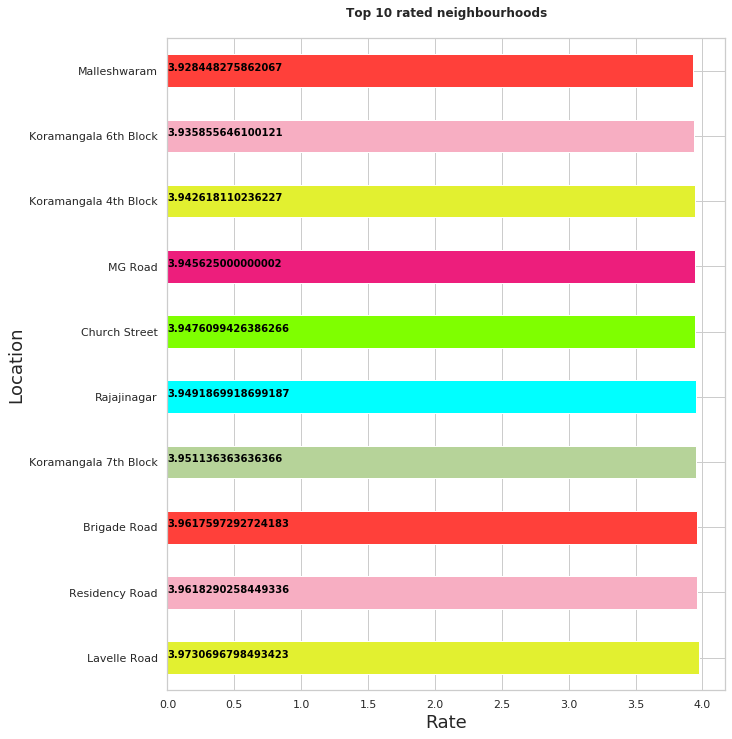

In [30]:
rcParams['figure.figsize'] = 10,12
count_nghbour = df.groupby('main_location')['rate'].mean().sort_values(ascending=False)[:10]
_ = count_nghbour.plot('barh',color=colors)
for i in range(len(count_nghbour)):
  _ = plt.text(0,i,count_nghbour[i],fontsize=10,color="BLACK",fontweight='bold')
_ = plt.title('Top 10 rated neighbourhoods\n',weight='bold', size=12)
_ = plt.xlabel('Rate', fontsize = 18)
_ = plt.ylabel('Location', fontsize = 18)
_ = fig.set_size_inches(15,15)
_ = plt.show()

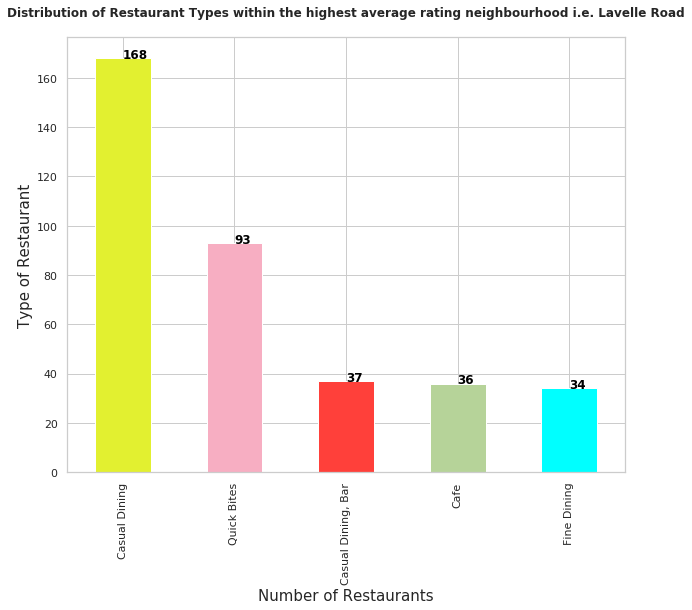

In [32]:
rcParams['figure.figsize'] = 10,8
restTypeCounter=df.groupby('main_location')['rest_type'].value_counts().sort_values(ascending=False)
restTypeNghbour = restTypeCounter.loc['Lavelle Road']
_ = restTypeNghbour[:5].plot('bar',color=colors)
for i in range(len(restTypeNghbour[:5])):
  x = plt.text(i,restTypeNghbour[i],restTypeNghbour[i],fontsize=10,color="BLACK",fontweight='bold', size = "12")
_ = plt.xlabel('Number of Restaurants', fontsize = 15)
_ = plt.ylabel('Type of Restaurant', fontsize = 15)
title = plt.title("Distribution of Restaurant Types within the highest average rating neighbourhood i.e. Lavelle Road\n",size=12, weight="bold")

,main_location,variable
cuisine_new,,
North Indian,198,198
Chinese,150,150
Continental,109,109
South Indian,75,75
Fast Food,64,64
Italian,64,64
Cafe,62,62
Desserts,59,59
Beverages,41,41


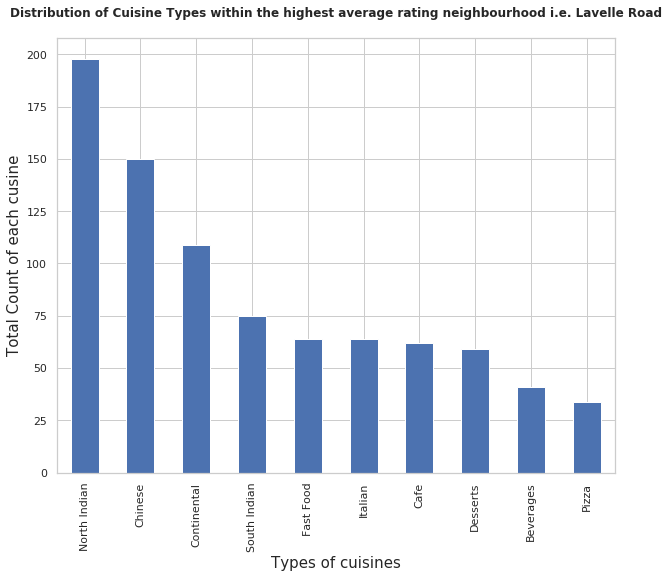

In [35]:
#The code to seperate the comma seperated values in a column is inspired from the following online page:
#https://www.mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas/
  
rcParams['figure.figsize'] = 10,8

#create a copy of the origional dataframe. This new frame will only gave main_location and cuisines column
popNghbrCuisine = df[['main_location', 'cuisines']].copy()
#Select the data where main location is Lavelle Road i.e. the highest average rating neighbourhood
popNghbrCuisine = popNghbrCuisine[popNghbrCuisine['main_location'] == "Lavelle Road"]
#Split the rows if there are any , seperated cusines
popNghbrCuisine['cuisines']= [x.split(',') for x in popNghbrCuisine['cuisines']]
popNghbrCuisine = popNghbrCuisine.cuisines.apply(pd.Series).merge(popNghbrCuisine, right_index = True, left_index = True).drop(["cuisines"], axis = 1)\
     .melt(id_vars = ['main_location'], value_name = "cuisine_new")
#remove null values
popNghbrCuisine = popNghbrCuisine[popNghbrCuisine.cuisine_new.notnull()]
#Convert the cusines_new column to string type for string operation
popNghbrCuisine.cuisine_new = popNghbrCuisine.cuisine_new.astype('str')
#String the starting and trailing spaces
popNghbrCuisine.cuisine_new = popNghbrCuisine.cuisine_new.apply(lambda r: r.strip())
#plot the graph 
popNghbrCuisine['cuisine_new'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
_ = plt.xlabel('Types of cuisines', fontsize = 15)
_ = plt.ylabel('Total Count of each cusine', fontsize = 15)
title = plt.title("Distribution of Cuisine Types within the highest average rating neighbourhood i.e. Lavelle Road\n",size=12, weight="bold")
#Display the exact numbers
popNghbrCuisine = popNghbrCuisine.groupby('cuisine_new').count().sort_values(by='variable',ascending=False)[:10]
popNghbrCuisine

# **3. Building the Model**



**3. a) Explain what is the task you’re solving (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x etc).**

---

This task is a supervised regression task. The justification for making these judgements is as explained below:
*   SUPERVISED LEARNING - Any learning algorithm or model that looks at labelled dataset and creates a mapping between the input and output variables is a supervised learning problem. In this problem, we are training our model using the labelled dataset in zomato.csv to establish a relationship between the input attributes like location, rating, restaurant type, and cuisine and the output attribute to be predicted i.e. cost of two. Thus, it is a supervised learning problem. 
*   REGRESSION - In this problem, we are trying to predict a discrete value rather than a continuous value. Hence, this is a regression task.

**3. b) What models will you choose? Why?**

---

This is a regression task where we are trying to predict a discrete numerical value. Below listed are the models that have been listed as Regressors in the SciKit docmentation and can be used to solve the problem at hand. [2] :

1. Decision Tree
2. Random Forest
3. k-nearest neighbor
4. Neural Network (Multi-Layer Perceptron)
5. SVM

These models are chosen considering the business problem, available features and the distribution of values in the dataset. However, the model which will demonstrate the best performancec based on the selected metrics will be finalised.

**3) c) Which metrics will you use to evaluate your model?**

---

Metrics help us to understand the performance of the model. The choice of the evaluation metric, however, depends on the dataset, the domain of knowledge and the model we use for making predictions. There are many evaluation metrics that can be used for regression tasks [3]. Few of them are given below. 

1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. R Squared (R²)
5. Mean Absolute Percentage Error (MAPE) [4]

After analyzing the data, we have decided to use **MSE and R²** as the evaluation metric over the other metrics. The reasons for not selecting other metrics for predicting cost of two are given below:
1. Mean Squared Error (MSE) - MSE measures average squared error of our predictions. The higher the MSE, the worst the model. MSE creates a problem only if the data is noisy, which is not true in our case as we have done proper cleaning. Thus,we willuse this metric.
2. Root Mean Squared Error (RMSE) - RMSE is better than MSE as it penalizes large errors in predictions. [5] However, there is no scoring option in cross_val_score of sklearn for directly calculating this metric. Hence, we will use MSE instead.
3. Mean absolute error (MAE) - We do not have outliers in our data and hence we prefer RMSE over MAE. [6]
4. R Squared (R²) - This metric helps us to understand how well our model has performed as compared to a baseline. it often describes how "good" that model is at making predictions, which is desirable in this case. An R² of 0 means that the dependent variable cannot be predicted from the independent variable. An R² of 1 means the dependent variable can be predicted without error from the independent variable. An R² between 0 and 1 indicates the extent to which the dependent variable is predictable. [7]
5. Mean Absolute Percentage Error (MAPE) - This is similar to MAE, but it creates problems where actual data has true observation as 0. [4] Thus, this metric is not suitable in our case. We do have rows where restaurant ratings can be 0, such as new restaurants which haven't been rated yet.


**3) d) How do you make sure not to overfit?**

---
We expect our model to be generalized so that it can make good predictions for unseen data as well. Thus, it is important to avoid overfitting the data to the training dataset. We will use below techniques to make sure that the model does not overfit.

1. Cross validation [8] - Cross-validation estimates the model's predictive performance over all the data by performing multiple splits and systematically swapping out samples for testing. It is an iterative version of holdout training and testing method. Thus, it gives a much accurate estimation of how well a model has performed and can help us to ientify overfitting.

2. Pre-pruning in Decision tree and Random Forest [8]

3. Use ensembles like Random forests. Ensembles are a combinations of multiple predictors and thus it ensures that overfitting is avoided.

**3. e) Build your model and verify how it performs (using the metrics you have chosen inSection 3(c)) in your training data. Justify which evaluation approach you are using? (Out of sample validation or Cross-validation). Use a plot to justify your findings. How good is your model?**

* We have built our models for Decision Tree, Random Forest, Support Vector Regressor, KNN, and Multi layer Perceptron. We have used the metrics MSE and R2 to evaluate the models performance. The higher the MSE, the worst the model. R2, on the other hand, evaluates the scatter of the data points around the fitted regression line. Higher the R-squared value, better the model as it shows that there are smaller differences in the observed and fitted data. [9]

* The evaluation approach we are using is cross validation, over sample validation. Cross validation is an iterative version of the latter, and thus helps in giving a better estimate of the model's performance. The cross validation score also helps us to identify if the model is overfit or not, and we can tune the hyperparameters accordingly to get a generalized model.

* We have used a box plot to compare the performance of the models. The box plot shows that the R2 score for the Random Forest model is the highest (0.94) and this model has the least MSE. Thus Random Forest is chosen as the best model.

In [36]:
#Printing column names in the dataset
newColumns = df.columns.values
print("\n\033[1mColumns in original dataset")
print(newColumns)

#Just keeping attributes - 'rate', 'location', 'rest_type', 'cuisines', and 'approx_cost(for two people)'
newDataset = df.iloc[:, [3, 5, 7, 10, 8]]

#Printing column names in the new dataset
print("\n\033[1mColumns in the new dataset")
newColumns = newDataset.columns.values
print(newColumns)

#Printing column names after one hot encoding dataset
data_dummies = pd.get_dummies(newDataset , drop_first=True)
newColumns = data_dummies.columns.values
print("\n\033[1mColumns in the dataset after one-hot encoding")
print(newColumns)



Columns in original dataset
['name' 'online_order' 'book_table' 'rate' 'votes' 'rest_type'
 'dish_liked' 'cuisines' 'cost' 'rest_categ' 'main_location']

Columns in the new dataset
['rate' 'rest_type' 'cuisines' 'main_location' 'cost']

Columns in the dataset after one-hot encoding
['rate' 'cost' 'rest_type_Bakery, Cafe' ... 'main_location_Residency Road'
 'main_location_Sarjapur Road' 'main_location_Whitefield']


In [37]:
col_mask=newDataset.isnull().any(axis=0) 
print("\n\033[1mChecking if null values exist in the attributes")
print(col_mask)

#Removing infinite values from the dataset [9]
x = newDataset[~newDataset.isin([np.nan, np.inf, -np.inf]).any(1)]


Checking if null values exist in the attributes
rate             False
rest_type        False
cuisines         False
main_location    False
cost             False
dtype: bool


In [0]:
#Split train and test data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


labels=data_dummies['cost'];
data_dummies=data_dummies.drop(columns=['cost'])
x_train, x_test, y_train, y_test=train_test_split(data_dummies, labels, test_size=0.10, random_state=2)

In [0]:
#Defining the models
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
decision_tree = DecisionTreeClassifier()
mlp = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(6, 15), random_state=1)
svr = SVR(kernel='linear',gamma=0.0001, C=1.0, epsilon=0.2)
rf = RandomForestRegressor(n_estimators=200, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5)

In [0]:
#Cross validation having R2 as the scoring metric
decision_tree_r2_score = cross_val_score(decision_tree, x_train, y_train, cv=10, scoring='r2')
mlp_r2_score = cross_val_score(mlp, x_train, y_train, cv=5, scoring='r2')
svr_r2_score = cross_val_score(svr, x_train, y_train, cv=5, scoring='r2')
rf_r2_score = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')
knn_r2_score = cross_val_score(knn, x_train, y_train, cv=5, scoring='r2')


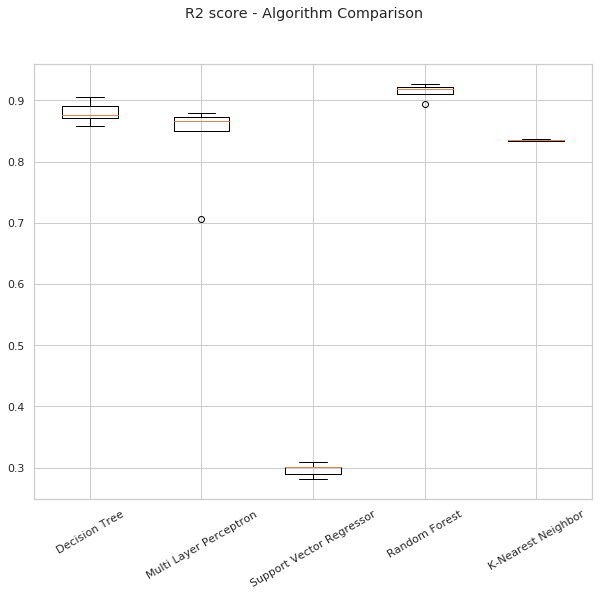

In [43]:
#Box Plot for comparision
results=[]
results.append(decision_tree_r2_score)
results.append(mlp_r2_score)
results.append(svr_r2_score)
results.append(rf_r2_score)
results.append(knn_r2_score)


names=['Decision Tree', 'Multi Layer Perceptron', 'Support Vector Regressor', 'Random Forest', 'K-Nearest Neighbor']
fig = plt.figure()
_ = fig.suptitle('R2 score - Algorithm Comparison')
ax = fig.add_subplot()
_ = plt.boxplot(results)
_ = ax.set_xticklabels(names, rotation=30)
_ = plt.show()

In [0]:
#Cross validation having Mean squared error as the scoring metric
decision_tree_rmse = cross_val_score(decision_tree, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mlp_rmse = cross_val_score(mlp, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
svr_rmse = cross_val_score(svr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse = cross_val_score(rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
knn_rmse = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

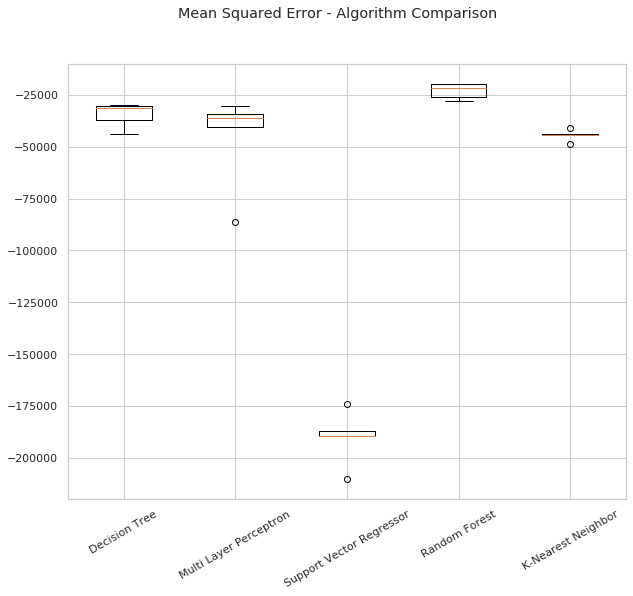

In [45]:
#Box Plot for comparision
results=[]
results.append(decision_tree_rmse)
results.append(mlp_rmse)
results.append(svr_rmse)
results.append(rf_rmse)
results.append(knn_rmse)


names=['Decision Tree', 'Multi Layer Perceptron', 'Support Vector Regressor', 'Random Forest', 'K-Nearest Neighbor']
fig = plt.figure()
_ = fig.suptitle('Mean Squared Error - Algorithm Comparison')
ax = fig.add_subplot()
_ = plt.boxplot(results)
_ = ax.set_xticklabels(names, rotation=30)
_ = plt.show()

**3. f) Test your model in your testing set and evaluate its performance. Use a plot to justify your findings. How is it performing compared to your training data?**

* A bar graph is plotted to compare the performance of the models on testing data.
* Random forest has the highest R2 score (0.98) and the lowest MSE (6634.31). Thus, it is the best model.
* [10] is referenced for the code in the below sections.

In [46]:
#Decision tree

decision_tree.fit(x_train,y_train)
y_pred_d = decision_tree.predict(x_test)
print()
mse_d=mean_squared_error(y_test, y_pred_d)
r2_d=r2_score(y_test, y_pred_d)
# The mean squared error
print("Mean squared error: %.2f"% mse_d)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_d)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Mean squared error: 34972.72
R2 score: 0.88


In [47]:
#Neural Network-Multi Layer Perceptron

mlp.fit(x_train,y_train)
y_pred_mlp = mlp.predict(x_test)
print()
mse_mlp=mean_squared_error(y_test, y_pred_mlp)
r2_mlp=r2_score(y_test, y_pred_mlp)
# The mean squared error
print("Mean squared error: %.2f"% mse_mlp)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_mlp)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6, 15), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)


Mean squared error: 33750.56
R2 score: 0.88


In [48]:
#Random Forest

rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print()
mse_rf=mean_squared_error(y_test, y_pred_rf)
r2_rf=r2_score(y_test, y_pred_rf)
# The mean squared error
print("Mean squared error: %.2f"% mse_rf)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


Mean squared error: 18149.10
R2 score: 0.94


In [49]:
#SVM
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print()
mse_svr=mean_squared_error(y_test, y_pred_svr)
r2_svr=r2_score(y_test, y_pred_svr)
# The mean squared error
print("Mean squared error: %.2f"% mse_svr)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_svr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Mean squared error: 195902.76
R2 score: 0.32


In [50]:
#k-Nearest Neighbor
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print()
mse_knn=mean_squared_error(y_test, y_pred_knn)
r2_knn=r2_score(y_test, y_pred_knn)
# The mean squared error
print("Mean squared error: %.2f"% mse_knn)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


Mean squared error: 40699.70
R2 score: 0.86


[0.8781252925392034, 0.8823843470737591, 0.31730814520692097, 0.9367531026307291, 0.8581676242194123]


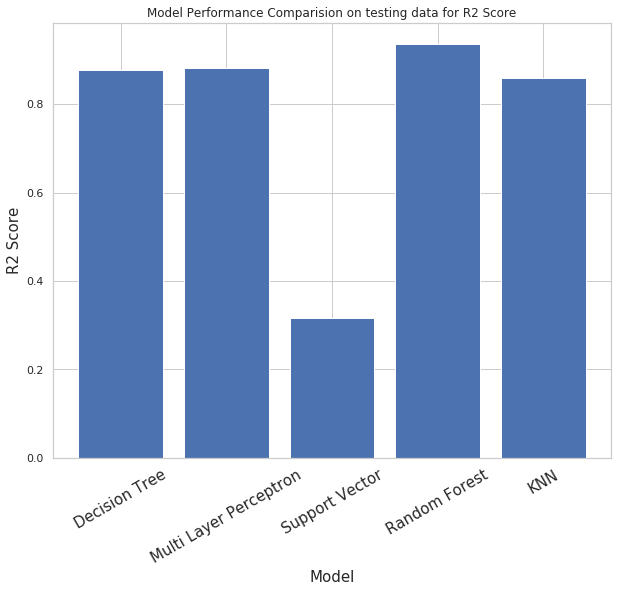

In [51]:
#Plot for Model Performance Comparision on testing data for R2 Score
results=[]
results.append(r2_d)
results.append(r2_mlp)
results.append(r2_svr)
results.append(r2_rf)
results.append(r2_knn)
print(results)
label = ['Decision Tree', 'Multi Layer Perceptron', 'Support Vector', 'Random Forest', 'KNN']
index = np.arange(len(label))
_ = plt.bar(index, results)
_ = plt.xlabel('Model', fontsize=15)
_ = plt.ylabel('R2 Score', fontsize=15)
_ = plt.xticks(index, label, fontsize=15, rotation=30)
_ = plt.title('Model Performance Comparision on testing data for R2 Score')
_ = plt.show()


[34972.72131147541, 33750.5585642515, 195902.76339307424, 18149.098870432204, 40699.700983606555]


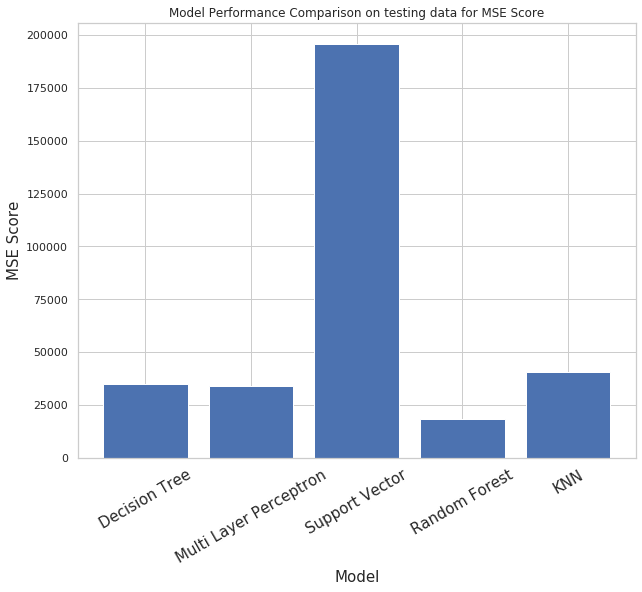

In [52]:
#Plot for Model Performance Comparison on testing data for MSE Score
results_mse=[]
results_mse.append(mse_d)
results_mse.append(mse_mlp)
results_mse.append(mse_svr)
results_mse.append(mse_rf)
results_mse.append(mse_knn)
print(results_mse)
label = ['Decision Tree', 'Multi Layer Perceptron', 'Support Vector', 'Random Forest', 'KNN']
index = np.arange(len(label))
_ = plt.bar(index, results_mse)
_ = plt.xlabel('Model', fontsize=15)
_ = plt.ylabel('MSE Score', fontsize=15)
_ = plt.xticks(index, label, fontsize=15, rotation=30)
_ = plt.title('Model Performance Comparison on testing data for MSE Score')
_ = plt.show()

**3. g) Can you tune your model to perform better? Explain the technique you’re using and justify why it is improving your results.**

* Yes, we can tune the model to perform better. We will increase the folds in cross validation and also use hyperparameter tuning technique in this case to improve the performance of the model. 

* As we see, Random forest is performing better than the other models in our case. In the case of a random forest, hyperparameters include the number of decision trees in the forest, minimum sample splits, maximum depth of each tree in the forest, minimum sample leaves, and number of features considered by each tree when splitting a node. [11] We can tweak all these parameters by using Grid Search with Cross Validation (k=10 folds).

* Grid search allows us to find the best parameter setting for the model we are trying to tune. We pass a parameter grid specifying the different values of the hyperparameters. These values are passed to the GridSearchCV which perfroms an exhaustive search over specified parameters and gives the best model. We use this model (best_rf) to make predictions for the test data.

* We can clearly see that the MSE for the Random forest has drastically reduced. (Previously the MSE for random forest was 18146.98, whereas now it is 6532) Also, the R2 score has improved from 0.94 to 0.98.

In [0]:
from sklearn.model_selection import GridSearchCV 
# Define a parameter grid [11] 
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [5000, 10000000, 1000000000],
    'min_samples_split': [2, 3, 4],
    'max_features': [2, 3],
    'n_estimators': [200,250,300]
}

#Grid search cross validation
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [54]:
#Grid Search for Hyper parameter training
a=grid_search.fit(x_train,y_train)
print()
print('Best Parameters')
grid_search.best_params_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 61.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 186.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 251.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 376.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 378.6min finished



Best Parameters


{'max_depth': 10000000,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [55]:
#Using the best model for making predictions based on grid search
print('Using the best model for making predictions')
best_rf = grid_search.best_estimator_
#bestrf_r2_score = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
#bestrf_mse_score = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='mean_squared_error')
y_pred = best_rf.predict(x_test)
print()
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
# The mean squared error
print("Mean squared error using best model: %.2f"% mse)
# Explained variance score: 1 is perfect prediction
print('R2 score using best model: %.2f' % r2)

Using the best model for making predictions

Mean squared error using best model: 39580.54
R2 score using best model: 0.86


**3. h) Use relief feature selection to improve your model.**
* The best model is the one for 4 selected features

In [56]:
!pip install skrebate

  Created wheel for skrebate: filename=skrebate-0.6-cp36-none-any.whl size=29329 sha256=898d075aa11c7211fc459c69ab9846940bd8550bac8639d4bd8fc285cf226ce2
  Stored in directory: /root/.cache/pip/wheels/f5/99/36/c827bcfa6852c6d068895b2723c57cea84f93642270c6dc05c
Successfully built skrebate


In [0]:
# This code is inspired from following links:
# 1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# 2. https://epistasislab.github.io/scikit-rebate/using/

from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

relief_data = df.iloc[:, [3, 5, 7, 10, 8]]
relief_data[['main_location', 'rest_type', 'cuisines']] = newDataset[['main_location', 'rest_type', 'cuisines']]\
  .apply(lambda col: LabelEncoder().fit_transform(col))

rows=relief_data[['rate','rest_type','cuisines','main_location']]
labels=relief_data['cost']

In [58]:
clf = make_pipeline(ReliefF(n_features_to_select=1, n_neighbors=100),
                    RandomForestRegressor(n_estimators=100))
print("Number of Features: 1")
print("\nMSE score: ")
np.mean(cross_val_score(clf, rows.values, labels.values,cv=5, scoring='neg_mean_squared_error'))
print("\nR square score: ")
np.mean(cross_val_score(clf, rows.values, labels.values,cv=5, scoring='r2'))

Number of Features: 1

MSE score: 


-76962.51900947465


R square score: 


0.7013688482204269

In [59]:
clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestRegressor(n_estimators=100))
print("Number of Features: 2")
print("\nMSE score: ")
np.mean(cross_val_score(clf, rows.values, labels.values,cv=5, scoring='neg_mean_squared_error'))
print("\nR square score: ")
np.mean(cross_val_score(clf, rows.values, labels.values,cv=5, scoring='r2'))

Number of Features: 2

MSE score: 


-28740.617184529332


R square score: 


0.8816956676280086

In [60]:
clf = make_pipeline(ReliefF(n_features_to_select=3, n_neighbors=100),
                    RandomForestRegressor(n_estimators=100))
print("Number of Features: 3")
print("\nMSE score: ")
np.mean(cross_val_score(clf, rows.values, labels.values,cv=5, scoring='neg_mean_squared_error'))
print("\nR square score: ")
np.mean(cross_val_score(clf, rows.values, labels.values,cv=5, scoring='r2'))

Number of Features: 3

MSE score: 


-20663.93063237423


R square score: 


0.9154373710391244

**References:**



[1] "Zomato", En.wikipedia.org, 2019. [Online]. Available: https://en.wikipedia.org/wiki/Zomato. [Accessed: 22- Jun- 2019].

[2]"API Reference — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/classes.html. [Accessed: 28- Jun- 2019].

[3] Evaluation Metrics in Regression Models - Regression | Coursera", Coursera, 2019. [Online]. Available: https://www.coursera.org/lecture/machine-learning-with-python/evaluation-metrics-in-regression-models-5SxtZ?. [Accessed: 29- Jun- 2019]."

[4] "How to select the Right Evaluation Metric for Machine Learning Models: Part 1 Regression Metrics", Towards Data Science, 2019. [Online]. Available: https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0. [Accessed: 30- Jun- 2019].

[5] "MAE and RMSE — Which Metric is Better? - Human in a Machine World - Medium", Medium, 2019. [Online]. Available: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d. [Accessed: 30- Jun- 2019].

[6] "Choosing the Right Metric for Evaluating Machine Learning Models — Part 1", Medium, 2019. [Online]. Available: https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4. [Accessed: 30- Jun- 2019].

[7] "Coefficient of Determination: Definition", Stattrek.com, 2019. [Online]. Available: https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination. [Accessed: 30- Jun- 2019].

[8] F. Provost and T. Fawcett, Data science for business. O’Reilly, 2013, pp. 111-138.

[9] J. Frost, "How To Interpret R-squared in Regression Analysis - Statistics By Jim", Statistics By Jim, 2019. [Online]. Available: https://statisticsbyjim.com/regression/interpret-r-squared-regression/. [Accessed: 02- Jul- 2019].

[10] "Documentation scikit-learn: machine learning in Python — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/documentation.html. [Accessed: 02- Jul- 2019].

[11] "Hyperparameter Tuning the Random Forest in Python - Towards Data Science", Medium, 2019. [Online]. Available: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74. [Accessed: 02- Jul- 2019].

[12] "Finding the best restaurants in Bangalore | Kaggle", Kaggle.com, 2019. [Online]. Available: https://www.kaggle.com/parthsharma5795/finding-the-best-restaurants-in-bangalore. [Accessed: 01- Jul- 2019].